In [127]:
import pandas as pd
import matplotlib.pyplot as plotter

laps = pd.read_csv('../data/formula-1-race-data-19502017/lapTimes.csv').sort_values(by=['raceId']).copy()
races = pd.read_csv('../data/formula-1-race-data-19502017/races.csv').sort_values(by=['raceId']).copy()
qualifying = pd.read_csv('../data/formula-1-race-data-19502017/qualifying.csv').sort_values(by=['raceId']).copy()

laps = laps.rename(columns={'time':'lapTime'})
races = races.drop(columns='url')
qualifying = qualifying.drop(columns=['qualifyId', 'position', 'q1', 'q2', 'q3'])

data = pd.merge(laps, races, on='raceId')
data = pd.merge(data, qualifying, on=['raceId', 'driverId'])

meanByRace = data.groupby(['raceId']).mean().rename(columns={'milliseconds':'mean'})['mean']

data = pd.merge(data, meanByRace, on=['raceId'])
#data = data[((data['raceId'] >= 985) & (data['raceId'] <= 986))]

#plotter.scatter(x=data['milliseconds'], y=data['lap'], c=data['driverId'])

meanByRaceAndDriver = data.groupby(['raceId', 'driverId']).mean().rename(columns={'milliseconds':'driverMean'})['driverMean']
data = pd.merge(data, meanByRaceAndDriver, on=['raceId', 'driverId'])
data['driverTime'] = data['driverMean'] - data['mean']

In [128]:

data.head()

,raceId,driverId,lap,position,lapTime,milliseconds,year,round,circuitId,name,date,time,constructorId,number,mean,driverMean,driverTime
0,1,21,29,14,1:32.507,92507,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172,212.909899
1,1,21,38,11,1:30.236,90236,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172,212.909899
2,1,21,37,11,1:30.439,90439,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172,212.909899
3,1,21,36,11,1:30.520,90520,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172,212.909899
4,1,21,35,11,1:30.713,90713,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172,212.909899


In [126]:
data.head()

,raceId,driverId,lap,position,lapTime,milliseconds,year,round,circuitId,name,date,time,constructorId,number,mean,driverMean
0,1,21,29,14,1:32.507,92507,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172
1,1,21,38,11,1:30.236,90236,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172
2,1,21,37,11,1:30.439,90439,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172
3,1,21,36,11,1:30.520,90520,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172
4,1,21,35,11,1:30.713,90713,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,10,21,97427.745274,97640.655172


In [95]:
data.head()

,raceId,driverId,lap,position_x,time_x,milliseconds,year,round,circuitId,name,date,time_y,url,qualifyId,constructorId,number,position_y,q1,q2,q3
337398,985,832,44,7,1:41.459,101459,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852
337399,985,832,45,7,1:40.951,100951,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852
337400,985,832,46,7,1:40.763,100763,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852
337401,985,832,47,7,1:41.159,101159,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852
337402,985,832,50,7,1:40.919,100919,2017,17,69,United States Grand Prix,2017-10-22,19:00:00,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852


In [115]:
data = pd.merge(data, meanByRace, on=['raceId'])

In [116]:
data.head()

,raceId,driverId,lap,position_x,time_x,milliseconds_x,year,round,circuitId,name,...,url,qualifyId,constructorId,number,position_y,q1,q2,q3,milliseconds_y,mean
0,985,832,44,7,1:41.459,101459,2017,17,69,United States Grand Prix,...,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852,102314.033226,102314.033226
1,985,832,45,7,1:40.951,100951,2017,17,69,United States Grand Prix,...,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852,102314.033226,102314.033226
2,985,832,46,7,1:40.763,100763,2017,17,69,United States Grand Prix,...,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852,102314.033226,102314.033226
3,985,832,47,7,1:41.159,101159,2017,17,69,United States Grand Prix,...,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852,102314.033226,102314.033226
4,985,832,50,7,1:40.919,100919,2017,17,69,United States Grand Prix,...,https://en.wikipedia.org/wiki/2017_United_Stat...,7467,4,55,8,1:35.517,1:34.899,1:34.852,102314.033226,102314.033226


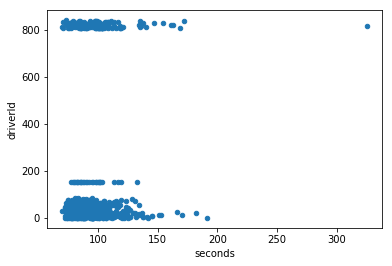